<a href="https://colab.research.google.com/github/ruthkum/ruthresh/blob/main/Singapore_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = '/content/ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv'
df = pd.read_csv(file_path)

# Display the first few rows and basic info to understand the structure of the dataset
df.head()


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979.0,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978.0,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980.0,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980.0,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980.0,62 years 05 months,265000.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189683 entries, 0 to 189682
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                189683 non-null  object 
 1   town                 189683 non-null  object 
 2   flat_type            189683 non-null  object 
 3   block                189683 non-null  object 
 4   street_name          189683 non-null  object 
 5   storey_range         189683 non-null  object 
 6   floor_area_sqm       189683 non-null  float64
 7   flat_model           189683 non-null  object 
 8   lease_commence_date  189683 non-null  int64  
 9   remaining_lease      189683 non-null  object 
 10  resale_price         189683 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 15.9+ MB


In [ ]:
# Data Cleaning

# Convert 'month' to datetime format
df['month'] = pd.to_datetime(df['month'], format='%Y-%m')

In [ ]:
# Extract the numeric part of 'remaining_lease' (e.g., years and months)
def extract_years(lease_str):
    # Split the string and convert to years
    parts = lease_str.split()
    years = int(parts[0])
    months = int(parts[2]) if len(parts) > 2 else 0
    return years + months / 12

df['remaining_lease_years'] = df['remaining_lease'].apply(extract_years)

In [ ]:
# Drop unnecessary columns for modeling
df_cleaned = df.drop(columns=['block', 'street_name', 'remaining_lease'])

In [ ]:
# Check for duplicates and missing values
duplicate_rows = df_cleaned.duplicated().sum()

In [ ]:
missing_values = df_cleaned.isnull().sum()

In [ ]:
df_cleaned.head(), duplicate_rows, missing_values

(       month        town flat_type storey_range  floor_area_sqm  \
 0 2017-01-01  ANG MO KIO    2 ROOM     10 TO 12            44.0   
 1 2017-01-01  ANG MO KIO    3 ROOM     01 TO 03            67.0   
 2 2017-01-01  ANG MO KIO    3 ROOM     01 TO 03            67.0   
 3 2017-01-01  ANG MO KIO    3 ROOM     04 TO 06            68.0   
 4 2017-01-01  ANG MO KIO    3 ROOM     01 TO 03            67.0   
 
        flat_model  lease_commence_date  resale_price  remaining_lease_years  
 0        Improved                 1979      232000.0              61.333333  
 1  New Generation                 1978      250000.0              60.583333  
 2  New Generation                 1980      262000.0              62.416667  
 3  New Generation                 1980      265000.0              62.083333  
 4  New Generation                 1980      265000.0              62.416667  ,
 661,
 month                    0
 town                     0
 flat_type                0
 storey_range            

In [ ]:
# Check the shape of the dataset
df.shape


(189683, 12)

# EDA - Exploratory Data Analysis


In [ ]:
# 1. Summary Statistics
print(df.describe())

                               month  floor_area_sqm  lease_commence_date  \
count                         189683   189683.000000        189683.000000   
mean   2021-01-23 21:25:10.598209024       97.071385          1996.110537   
min              2017-01-01 00:00:00       31.000000          1966.000000   
25%              2019-04-01 00:00:00       82.000000          1985.000000   
50%              2021-04-01 00:00:00       93.000000          1996.000000   
75%              2022-12-01 00:00:00      112.000000          2011.000000   
max              2024-09-01 00:00:00      366.700000          2020.000000   
std                              NaN       24.036233            14.100331   

       resale_price  remaining_lease_years  
count  1.896830e+05          189683.000000  
mean   5.032849e+05              74.540158  
min    1.400000e+05              41.416667  
25%    3.750000e+05              63.000000  
50%    4.710000e+05              74.416667  
75%    6.000000e+05              88.

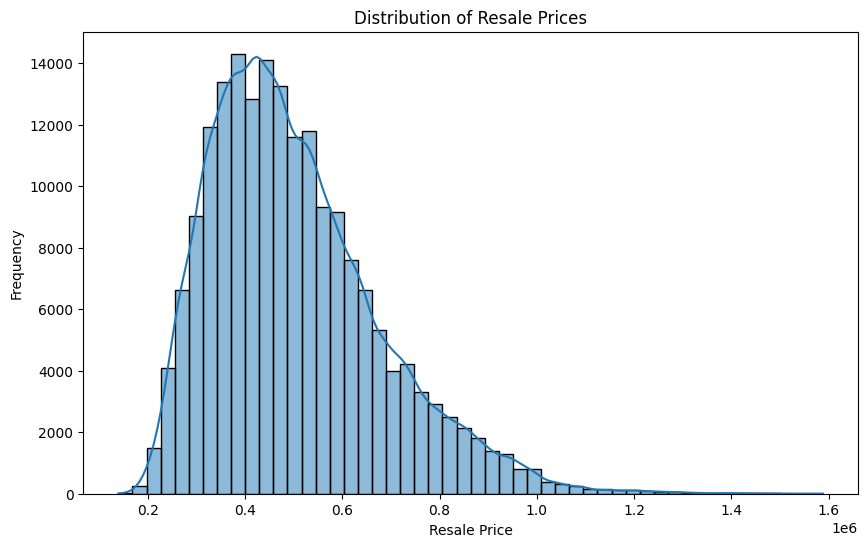

In [ ]:
# 2. Distribution of Resale Prices
plt.figure(figsize=(10, 6))
sns.histplot(df['resale_price'], bins=50, kde=True)
plt.title('Distribution of Resale Prices')
plt.xlabel('Resale Price')
plt.ylabel('Frequency')
plt.show()

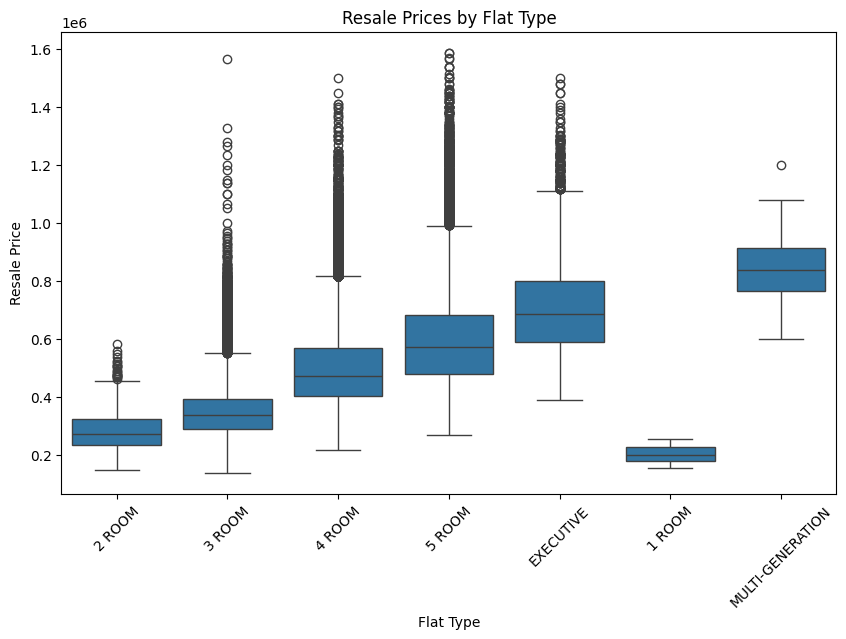

In [ ]:
# 3. Boxplot of Resale Prices by Flat Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='flat_type', y='resale_price', data=df)
plt.title('Resale Prices by Flat Type')
plt.xlabel('Flat Type')
plt.ylabel('Resale Price')
plt.xticks(rotation=45)
plt.show()

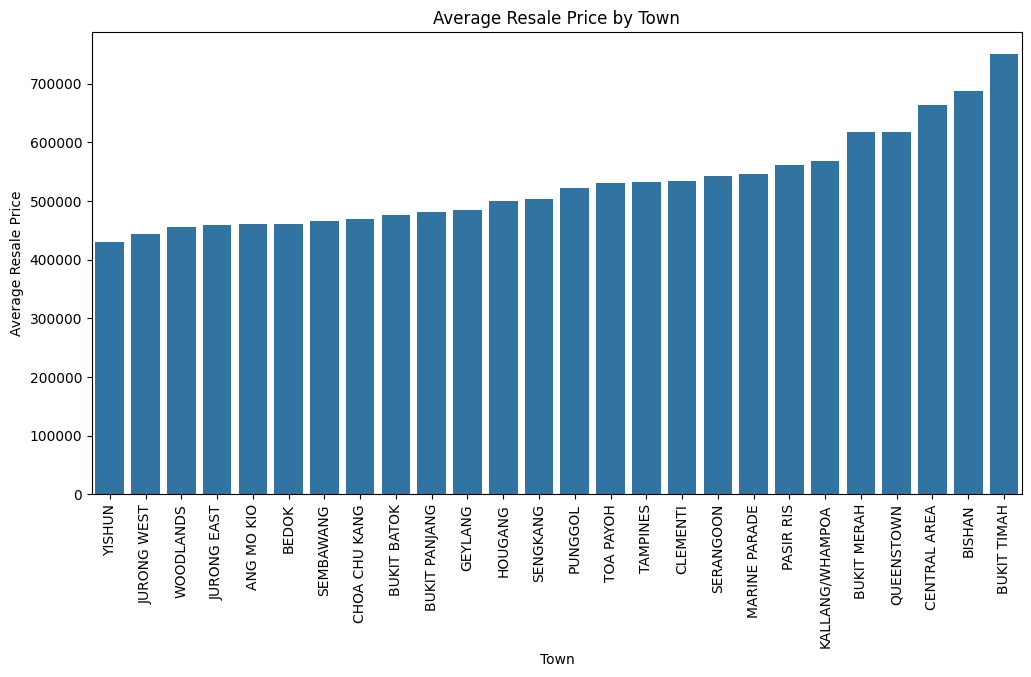

In [ ]:
# 4. Average Resale Price by Town
plt.figure(figsize=(12, 6))
town_price = df.groupby('town')['resale_price'].mean().sort_values()
sns.barplot(x=town_price.index, y=town_price.values)
plt.title('Average Resale Price by Town')
plt.xlabel('Town')
plt.ylabel('Average Resale Price')
plt.xticks(rotation=90)
plt.show()

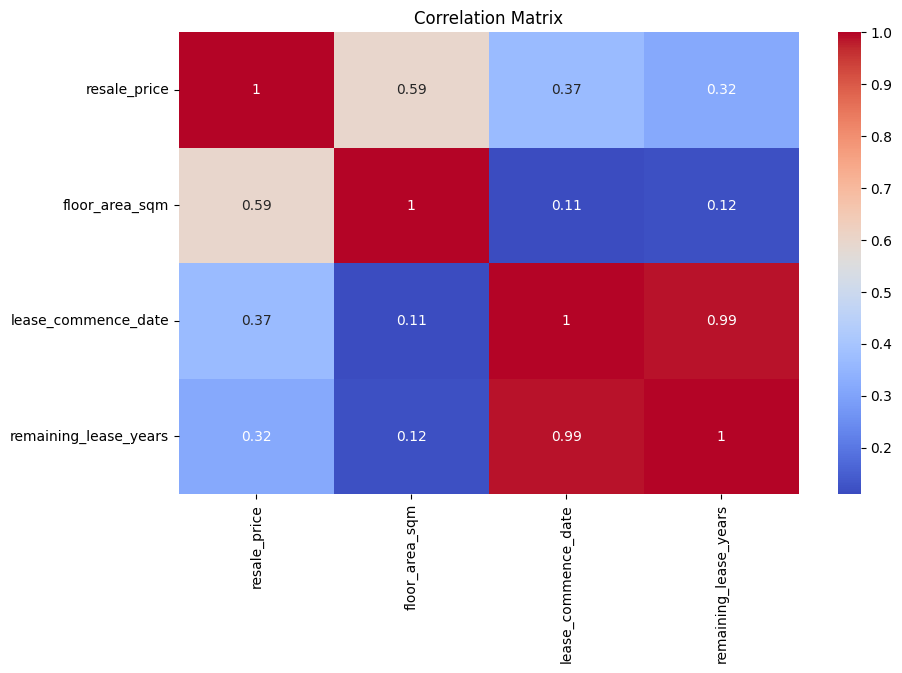

In [ ]:
# 5. Correlation Matrix
plt.figure(figsize=(10, 6))
corr = df_cleaned[['resale_price', 'floor_area_sqm', 'lease_commence_date', 'remaining_lease_years']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

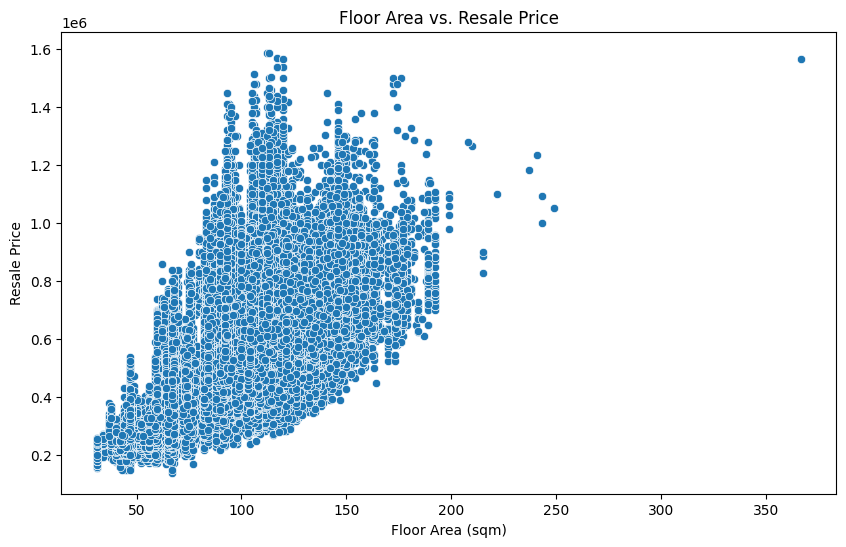

In [ ]:
# 6. Scatter plot: Floor Area vs. Resale Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='floor_area_sqm', y='resale_price', data=df_cleaned)
plt.title('Floor Area vs. Resale Price')
plt.xlabel('Floor Area (sqm)')
plt.ylabel('Resale Price')
plt.show()

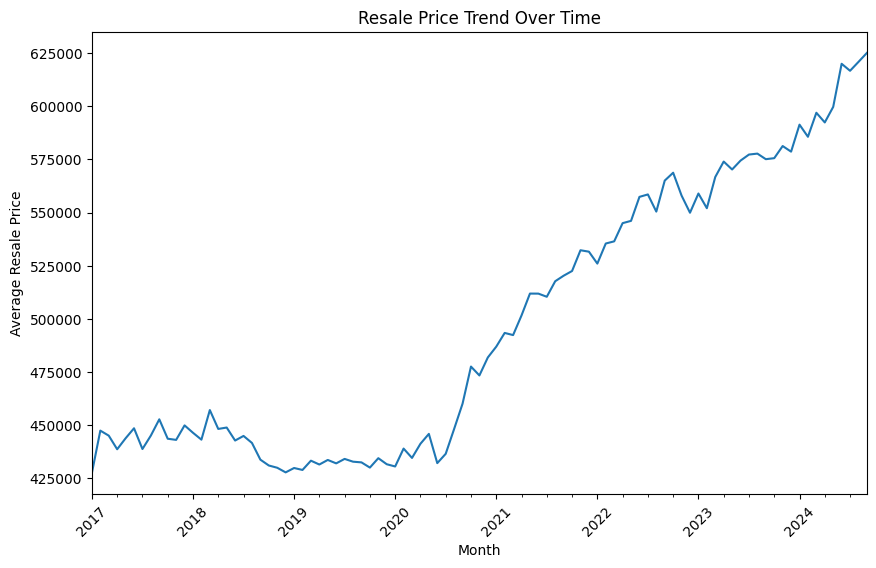

In [ ]:
# 7. Resale Price Trend Over Time
plt.figure(figsize=(10, 6))
df_cleaned.groupby('month')['resale_price'].mean().plot()
plt.title('Resale Price Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Average Resale Price')
plt.xticks(rotation=45)
plt.show()

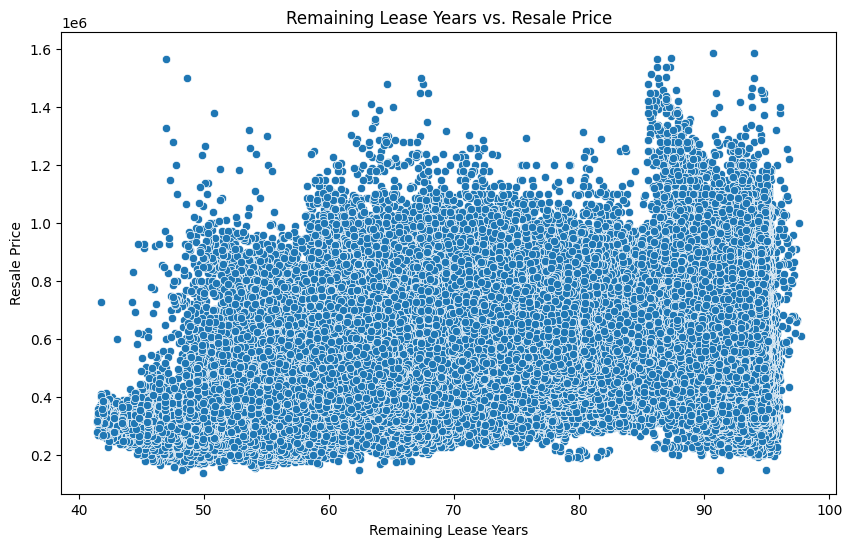

In [ ]:
# 8. Resale Price vs. Remaining Lease
plt.figure(figsize=(10, 6))
sns.scatterplot(x='remaining_lease_years', y='resale_price', data=df_cleaned)
plt.title('Remaining Lease Years vs. Resale Price')
plt.xlabel('Remaining Lease Years')
plt.ylabel('Resale Price')
plt.show()

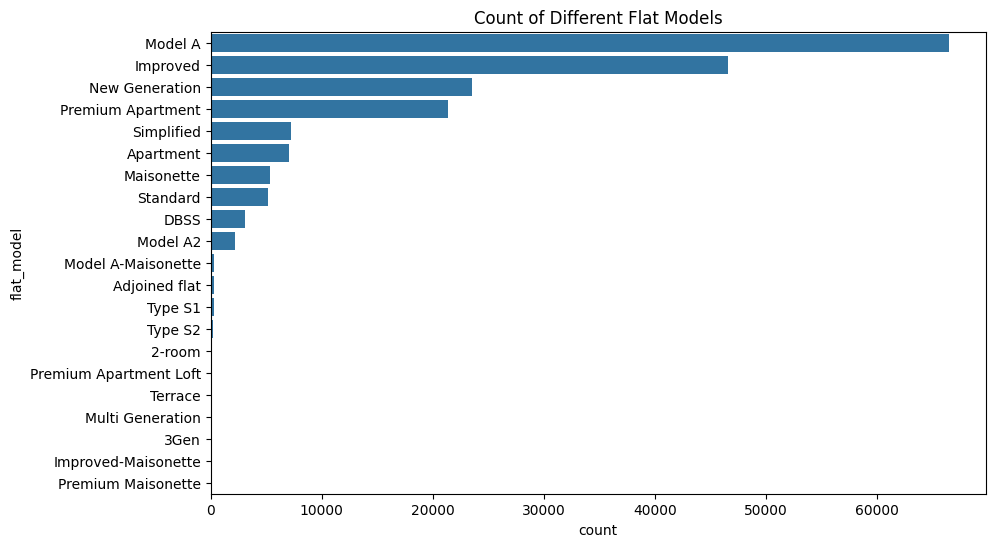

In [ ]:
# 9. Flat Model Count Plot
plt.figure(figsize=(10, 6))
sns.countplot(y='flat_model', data=df_cleaned, order=df_cleaned['flat_model'].value_counts().index)
plt.title('Count of Different Flat Models')
plt.show()

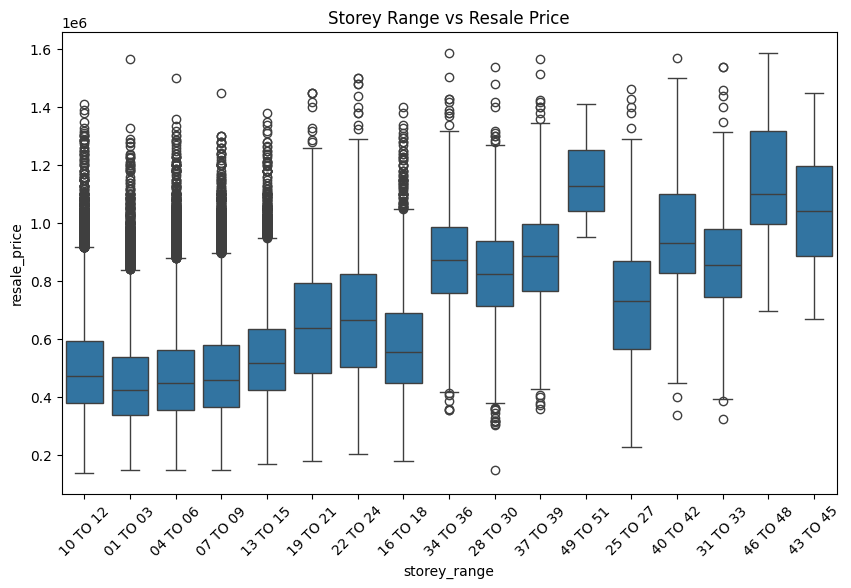

In [ ]:
# 10. Storey Range vs Resale Price
plt.figure(figsize=(10, 6))
sns.boxplot(x='storey_range', y='resale_price', data=df_cleaned)
plt.title('Storey Range vs Resale Price')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Summary of key points from EDA
print("Summary of the EDA:")
print(f"Total Rows: {df_cleaned.shape[0]}")
print(f"Total Columns: {df_cleaned.shape[1]}")
print("Numerical Correlations with Resale Price:")
print(corr['resale_price'].sort_values(ascending=False))

Summary of the EDA:
Total Rows: 189683
Total Columns: 9
Numerical Correlations with Resale Price:
resale_price             1.000000
floor_area_sqm           0.594658
lease_commence_date      0.366753
remaining_lease_years    0.318607
Name: resale_price, dtype: float64


In [ ]:
# Label encode categorical variables
label_encoder = LabelEncoder()
df_cleaned['town'] = label_encoder.fit_transform(df_cleaned['town'])
df_cleaned['flat_type'] = label_encoder.fit_transform(df_cleaned['flat_type'])
df_cleaned['flat_model'] = label_encoder.fit_transform(df_cleaned['flat_model'])
df_cleaned['storey_range'] = label_encoder.fit_transform(df_cleaned['storey_range'])

In [ ]:
# 3. Now, load and preprocess data
df = load_data()
df_cleaned = preprocess_data(df)

NameError: name 'load_data' is not defined

In [ ]:
# Encode 'town'
df_cleaned['town'] = label_encoder.fit_transform(df_cleaned['town'])
town_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Town Encoding:")
print(town_mapping)

Town Encoding:
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24, 25: 25}


In [ ]:
# Encode 'flat_type'
df_cleaned['flat_type'] = label_encoder.fit_transform(df_cleaned['flat_type'])
flat_type_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("\nFlat Type Encoding:")
print(flat_type_mapping)


Flat Type Encoding:
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6}


In [ ]:
# Encode 'flat_model'
df_cleaned['flat_model'] = label_encoder.fit_transform(df_cleaned['flat_model'])
flat_model_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("\nFlat Model Encoding:")
print(flat_model_mapping)


Flat Model Encoding:
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20}


In [ ]:
# Encode 'storey_range'
df_cleaned['storey_range'] = label_encoder.fit_transform(df_cleaned['storey_range'])
storey_range_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("\nStorey Range Encoding:")
print(storey_range_mapping)


Storey Range Encoding:
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16}


In [ ]:
# Define features (X) and target (y)
X = df_cleaned.drop(columns=['resale_price'])
y = df_cleaned['resale_price']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
# Train the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Root Mean Squared Error: 71825.48745338377
R-squared: 0.8296052201196505


In [ ]:
# Feature Importance
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

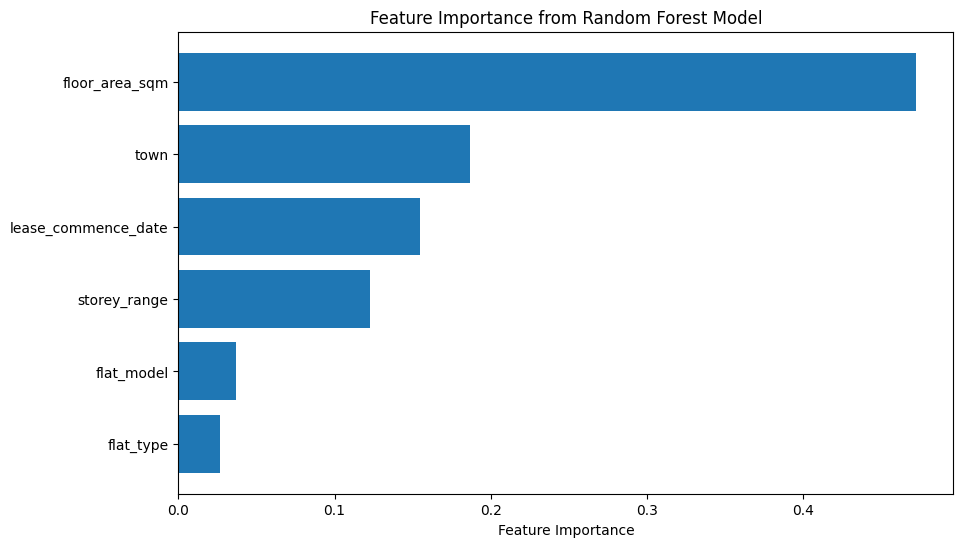

In [ ]:
# Plot Feature Importances
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Random Forest Model')
plt.gca().invert_yaxis()
plt.show()

17-09-2024 :

STREAMLIT :

In [ ]:
!pip install streamlit

  Using cached streamlit-1.38.0-py2.py3-none-any.whl.metadata (8.5 kB)
Using cached streamlit-1.38.0-py2.py3-none-any.whl (8.7 MB)


In [13]:
!pip install -q streamlit

In [15]:
!streamlit run app.py &>/content/logs.txt &

In [17]:
!wget -q -O  - ipv4.icanhazip.com

34.148.89.205


In [18]:
!npx localtunnel --port 8501

your url is: https://light-pants-peel.loca.lt
^C


19-09-2024 :

In [11]:
%%writefile app.py

import streamlit as st
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import joblib
import os
import matplotlib.pyplot as plt

# Load and preprocess data
@st.cache_data
def load_data(uploaded_file):
    df = pd.read_csv(uploaded_file)
    return df

@st.cache_data
def preprocess_data(df):
    if 'month' in df.columns:
        df['month'] = pd.to_datetime(df['month'], format='%Y-%m')

    # Process 'remaining_lease' column if exists
    if 'remaining_lease' in df.columns:
        def extract_years(lease_str):
            parts = lease_str.split()
            years = int(parts[0])
            months = int(parts[2]) if len(parts) > 2 else 0
            return years + months / 12
        df['remaining_lease_years'] = df['remaining_lease'].apply(extract_years)

    df_cleaned = df.drop(columns=['block', 'street_name', 'remaining_lease', 'month'], errors='ignore')

    # Label encode categorical variables
    encoders = {}
    for col in ['town', 'flat_type', 'flat_model', 'storey_range']:
        encoders[col] = LabelEncoder()
        df_cleaned[col] = encoders[col].fit_transform(df_cleaned[col])

    return df_cleaned, encoders

@st.cache_resource
def load_or_train_model(X, y):
    model_path = 'random_forest_model.pkl'
    if os.path.exists(model_path):
        rf_model = joblib.load(model_path)
    else:
        rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
        rf_model.fit(X, y)
        joblib.dump(rf_model, model_path)
    return rf_model

# Function to display a bar plot
def display_bar_plot(df, column):
    # Count the occurrences of each category in the column
    category_counts = df[column].value_counts()

    # Plot a bar chart
    fig, ax = plt.subplots()
    category_counts.plot(kind='bar', ax=ax, color='skyblue', edgecolor='black')
    ax.set_title(f'Distribution of {column}')
    ax.set_ylabel('Count')
    ax.set_xlabel(column)

    st.pyplot(fig)

# Streamlit app layout
st.title('Singapore Resale Flat Price Prediction App')

# 1. Upload dataset
uploaded_file = st.file_uploader("Upload your dataset (CSV format)", type=['csv'])

if uploaded_file is not None:
    df = load_data(uploaded_file)
    df_cleaned, encoders = preprocess_data(df)

    # Only continue if preprocessing succeeded
    if df_cleaned is not None:
        st.subheader('Cleaned Dataset')
        st.write(df_cleaned.head())

        X = df_cleaned.drop(columns=['resale_price'])
        y = df_cleaned['resale_price']

        # Train or load the model
        rf_model = load_or_train_model(X, y)

        st.sidebar.header('Input Features')

        with st.form(key='prediction_form'):
            st.write("Please fill out the following details to predict the resale price:")

            town = st.selectbox('Town', df['town'].unique())
            flat_type = st.selectbox('Flat Type', df['flat_type'].unique())
            flat_model = st.selectbox('Flat Model', df['flat_model'].unique())
            floor_area_sqm = st.slider('Floor Area (sqm)', int(df['floor_area_sqm'].min()), int(df['floor_area_sqm'].max()), int(df['floor_area_sqm'].mean()))
            lease_commence_date = st.slider('Lease Commencement Year', int(df['lease_commence_date'].min()), int(df['lease_commence_date'].max()), int(df['lease_commence_date'].mean()))

            if 'remaining_lease_years' in df_cleaned.columns:
                remaining_lease_years = st.slider('Remaining Lease (years)', int(df_cleaned['remaining_lease_years'].min()), int(df_cleaned['remaining_lease_years'].max()), int(df_cleaned['remaining_lease_years'].mean()))
            else:
                remaining_lease_years = 0  # Default value or handle differently

            storey_range = st.selectbox('Storey Range', df['storey_range'].unique())

            submit_button = st.form_submit_button(label='Submit')

        if submit_button:
            input_data = {
                'town': [town],
                'flat_type': [flat_type],
                'flat_model': [flat_model],
                'floor_area_sqm': [floor_area_sqm],
                'lease_commence_date': [lease_commence_date],
                'remaining_lease_years': [remaining_lease_years],
                'storey_range': [storey_range]
            }
            input_df = pd.DataFrame(input_data)

            # Label encode user input
            for col in ['town', 'flat_type', 'flat_model', 'storey_range']:
                if input_df[col][0] in encoders[col].classes_:
                    input_df[col] = encoders[col].transform(input_df[col])
                else:
                    st.error(f"Unseen label: {input_df[col][0]} in {col}. Cannot predict for unseen labels.")
                    st.stop()

            input_df = input_df[X.columns]

            st.subheader('User Input Features:')
            st.write(input_df)

            prediction = rf_model.predict(input_df)
            st.subheader('Predicted Resale Price:')
            st.write(f"${int(prediction[0]):,}")

        # Bar plot section
        st.sidebar.header('Data Visualization')
        st.sidebar.subheader('Generate Bar Plot')
        bar_plot_column = st.sidebar.selectbox('Choose a column for bar plot visualization:', ['town', 'flat_type', 'flat_model'])

        if st.sidebar.button('Show Bar Plot'):
            st.subheader(f'Bar Plot for {bar_plot_column}')
            display_bar_plot(df, bar_plot_column)

else:
    st.write("Please upload a CSV file to proceed.")


Overwriting app.py


In [ ]:
! pip uninstall streamlit

Found existing installation: streamlit 1.38.0
Uninstalling streamlit-1.38.0:
  Would remove:
    /usr/local/bin/streamlit
    /usr/local/bin/streamlit.cmd
    /usr/local/lib/python3.10/dist-packages/streamlit-1.38.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/streamlit/*
Proceed (Y/n)? y
  Successfully uninstalled streamlit-1.38.0


In [9]:
! pip install --upgrade streamlit
